# 项目：用线性回归预测房价数据

## 分析目标

此数据分析报告的目的是，基于已有的房屋销售价格，以及有关该房屋的属性，进行线性回归分析，从而利用得到的线性回归模型，能对以下未知售价的房屋根据属性进行价格预测：

面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修。

## 简介

数据集`house_price.csv`记录了超过五百栋房屋的交易价格，以及房屋的相关属性信息，包括房屋面积、卧室数、厕所数、楼层数、是否位于主路、是否有客房，等等。

`house_price.csv`每列的含义如下：
- price：房屋出售价格
- area：房屋面积，以平方英尺为单位
- bedrooms：卧室数
- bathrooms：厕所数
- stories：楼层数
- mainroad：是否位于主路
   - yes  是
   - no	  否
- guestroom：是否有客房
   - yes  是
   - no	  否
- basement：是否有地下室
   - yes  是
   - no	  否
- hotwaterheating：是否有热水器
   - yes  是
   - no	  否
- airconditioning：是否有空调
   - yes  是
   - no	  否
- parking：车库容量，以车辆数量为单位
- prefarea：是否位于城市首选社区
   - yes  是
   - no	  否
- furnishingstatus：装修状态
   - furnished       精装
   - semi-furnished	 简装
   - unfurnished     毛坯

## 导入数据

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import ztest
from scipy.stats import ttest_ind
import statsmodels.api as sm
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
house_price_orignal = pd.read_csv("./house_price.csv")
house_price_orignal

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## 清洗数据

In [3]:
house_price_clean = house_price_orignal.copy()
house_price_clean

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


数据结构没问题  
检查数据内容

In [4]:
house_price_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


数据类型没问题，无缺失值，不需要检查重复值，检查字符串数据列是否存在不一致数值

In [5]:
data_1 = house_price_clean["mainroad"].value_counts()
data_2 = house_price_clean["guestroom"].value_counts()
data_3 = house_price_clean["basement"].value_counts()
data_4 = house_price_clean["hotwaterheating"].value_counts()
data_5 = house_price_clean["airconditioning"].value_counts()
data_6 = house_price_clean["prefarea"].value_counts()
data_7 = house_price_clean["furnishingstatus"].value_counts()
print(data_1,data_2,data_3,data_4,data_5,data_6,data_7)

mainroad
yes    468
no      77
Name: count, dtype: int64 guestroom
no     448
yes     97
Name: count, dtype: int64 basement
no     354
yes    191
Name: count, dtype: int64 hotwaterheating
no     520
yes     25
Name: count, dtype: int64 airconditioning
no     373
yes    172
Name: count, dtype: int64 prefarea
no     417
yes    128
Name: count, dtype: int64 furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64


不存在不一致数据

## 数据分析

In [6]:
house_price_modeldata = house_price_clean.copy()
house_price_modeldata

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


因变量为`price` 其余为自变量  
其中`mainroad` `guestroom` `basement` `hotwaterheating` `airconditioning` `prefarea`列要把yes&no转成1&0  
`furnishingstatus` 列要转成虚拟变量

In [7]:
house_price_modeldata = house_price_modeldata.replace({"yes":1,"no":0}).infer_objects()
house_price_modeldata

C:\Users\QXY\AppData\Local\Temp\ipykernel_21352\2165244025.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  house_price_modeldata = house_price_modeldata.replace({"yes":1,"no":0}).infer_objects()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [8]:
house_price_modeldata = pd.get_dummies(data = house_price_modeldata, columns = ["furnishingstatus"], dtype = int , drop_first = True)
house_price_modeldata

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


定义自变量和因变量  
y：因变量  
x：自变量

In [9]:
y = house_price_modeldata["price"]
x = house_price_modeldata.drop("price",axis=1)

检查自变量相关系数是否有大于0.8的

[]

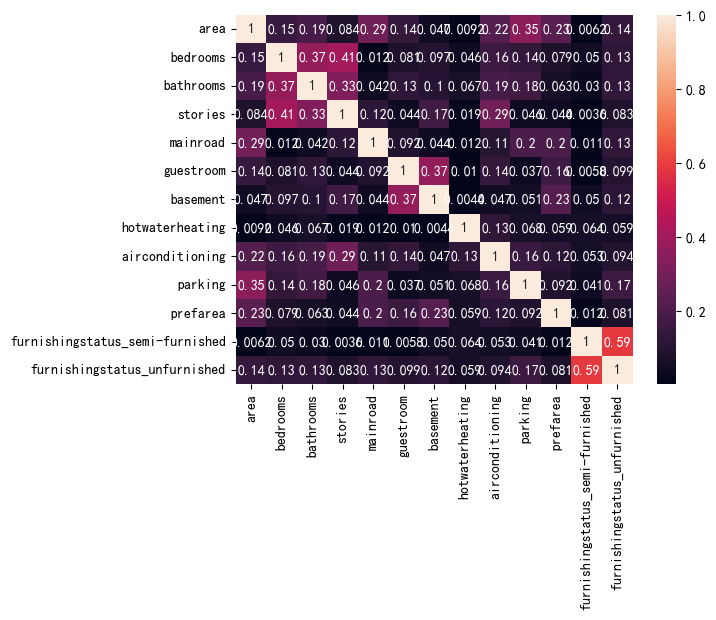

In [10]:
sns.heatmap(x.corr().abs(), annot = True)
plt.plot()

没有大于0.8的自变量，所有自变量可用，接下来截距传入自变量

In [11]:
x = sm.add_constant(x)

创建回归模型并展示回归模型数据，检查是否有问题

In [12]:
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     87.52
Date:                Tue, 05 Mar 2024   Prob (F-statistic):          9.07e-123
Time:                        17:54:39   Log-Likelihood:                -8331.5
No. Observations:                 545   AIC:                         1.669e+04
Df Residuals:                     531   BIC:                         1.675e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            4.277e+04   2.64e+05      0.162      0.872   -4.76e+05    5.62e+05
area                              244.1394     24.289     10.052      0.000     196.425     291.853
bedrooms                         1.148e+05   7.26e+04      1.581      0.114   -2.78e+04    2.57e+05
bathrooms                        9.877e+05   1.03e+05      9.555      0.000    7.85e+05    1.19e+06
stories                          4.508e+05   6.42e+04      7.026      0.000    3.25e+05    5.77e+05
mainroad                         4.213e+05   1.42e+05      2.962      0.003    1.42e+05    7.01e+05
guestroom                        3.005e+05   1.32e+05      2.282      0.023    4.18e+04    5.59e+05
basement                         3.501e+05    1.1e+05      3.175      0.002    1.33e+05    5.67e+05
hotwaterheating                  8.554e+05   2.23e+05      3.833      0.000    4.17e+05    1.29e+06
airconditioning                   8.65e+05   1.08e+05      7.983      0.000    6.52e+05    1.08e+06
parking                          2.771e+05   5.85e+04      4.735      0.000    1.62e+05    3.92e+05
prefarea                         6.515e+05   1.16e+05      5.632      0.000    4.24e+05    8.79e+05
furnishingstatus_semi-furnished -4.634e+04   1.17e+05     -0.398      0.691   -2.75e+05    1.83e+05
furnishingstatus_unfurnished    -4.112e+05   1.26e+05     -3.258      0.001   -6.59e+05   -1.63e+05
==============================================================================
Omnibus:                       97.909   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.281
Skew:                           0.895   Prob(JB):                     8.22e-57
Kurtosis:                       5.859   Cond. No.                     3.49e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

观察到P值大于0.05的自变量有`bedrooms` `furnishingstatus_semi-furnished` ，还有`const`的P值也大于0.05，所以要讲这几个自变量和截距删除重新计算模型

In [13]:
x = house_price_modeldata[["area","bathrooms","stories","mainroad","guestroom",
                           "basement","hotwaterheating","airconditioning","parking",
                           "prefarea","furnishingstatus_unfurnished"]]

In [14]:
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.956
Method:                 Least Squares   F-statistic:                              1088.
Date:                Tue, 05 Mar 2024   Prob (F-statistic):                        0.00
Time:                        17:54:40   Log-Likelihood:                         -8333.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     534   BIC:                                  1.674e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
area                           257.5854     22.577     11.409      0.000     213.234     301.936
bathrooms                     1.071e+06   9.27e+04     11.553      0.000    8.89e+05    1.25e+06
stories                       5.084e+05   5.71e+04      8.898      0.000    3.96e+05    6.21e+05
mainroad                      4.672e+05   1.27e+05      3.679      0.000    2.18e+05    7.17e+05
guestroom                     2.851e+05   1.31e+05      2.172      0.030    2.72e+04    5.43e+05
basement                      4.016e+05   1.07e+05      3.765      0.000    1.92e+05    6.11e+05
hotwaterheating               8.668e+05   2.23e+05      3.884      0.000    4.28e+05    1.31e+06
airconditioning               8.543e+05   1.07e+05      7.952      0.000    6.43e+05    1.07e+06
parking                       2.793e+05   5.83e+04      4.794      0.000    1.65e+05    3.94e+05
prefarea                      6.443e+05   1.15e+05      5.594      0.000    4.18e+05    8.71e+05
furnishingstatus_unfurnished -3.493e+05   9.49e+04     -3.679      0.000   -5.36e+05   -1.63e+05
==============================================================================
Omnibus:                       94.840   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.889
Skew:                           0.865   Prob(JB):                     2.01e-55
Kurtosis:                       5.845   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**调整后P值没问题，$R^2$的数值增长至0.957，拟合度较高模型可用**

对下面这个数据进行价格预测   
面积为6500平方英尺，有4个卧室、2个厕所，总共2层，不位于主路，无客人房，带地下室，有热水器，没有空调，车位数为2，位于城市首选社区，简装修

In [15]:
predict_data = pd.DataFrame({"area":[6500],"bathrooms":[2],"stories":[2],"mainroad":[0],"guestroom":[0],
                           "basement":[1],"hotwaterheating":[1],"airconditioning":[0],"parking":[2],
                           "prefarea":[1],"furnishingstatus_unfurnished":[0]},index = [1])
predict_data

,area,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_unfurnished
1,6500,2,2,0,0,1,1,0,2,1,0


In [16]:
result.predict(predict_data)

1    7.303754e+06
dtype: float64

**预测房价结果为730.3754万**